# <center>**GOOGLE PLAY STORE APPS: ANALYSIS & RATING PREDICTION**</center>


In [1]:
# %run /Users/shabnanasser/workplace/git/Capstone_3/Cap3_Preprocessing.ipynb

# Modeling

In the Data Modeling section, we are going to train our standardised data with three different ML models: Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, XGB Regressor, SVR, MLP Regressor. Also, we will check the Mean Squared Error (MSE), Mean Absolute Error (MAE), Median Absolute Error (MedAE), R-squared (R2) of each model and find the best performing model among them.

# 1) Linear Regression

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Define the model
linear_model = LinearRegression()

# Perform cross-validation
linear_cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Fit the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Linear Regression:")
print(f"  Cross-Validation Mean Squared Error (MSE): {-linear_cv_scores.mean()}")
print(f"  Mean Squared Error (MSE): {mse}")
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Median Absolute Error (MedAE): {medae}")
print(f"  R-squared (R2): {r2}")



Linear Regression:
  Cross-Validation Mean Squared Error (MSE): 0.4919303821009479
  Mean Squared Error (MSE): 0.5389688542667883
  Mean Absolute Error (MAE): 0.5274707410847345
  Median Absolute Error (MedAE): 0.39039503083325805
  R-squared (R2): 0.4572752635091919


# 2) Random Forest Regressor

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf_model = RandomForestRegressor()

# Perform cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_medae = median_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Print evaluation metrics
print("Random Forest Regressor:")
print(f"  Cross-Validation Mean Squared Error (MSE): {-rf_cv_scores.mean()}")
print(f"  Mean Squared Error (MSE): {rf_mse}")
print(f"  Mean Absolute Error (MAE): {rf_mae}")
print(f"  Median Absolute Error (MedAE): {rf_medae}")
print(f"  R-squared (R2): {rf_r2}")


Random Forest Regressor:
  Cross-Validation Mean Squared Error (MSE): 0.28293898991872996
  Mean Squared Error (MSE): 0.3001001930394997
  Mean Absolute Error (MAE): 0.36772011949795885
  Median Absolute Error (MedAE): 0.24506689248329827
  R-squared (R2): 0.6978085154664948


# 3) Gradient Boosting Regressor

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

# Perform GridSearchCV for Gradient Boosting Regressor
gb_grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid={}, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_grid_search.predict(X_test)

# Evaluate Gradient Boosting Regressor
gb_mse = mean_squared_error(y_test, gb_predictions)
mae = mean_absolute_error(y_test, gb_predictions)
medae = median_absolute_error(y_test, gb_predictions)
r2 = r2_score(y_test, gb_predictions)
print("Gradient Boosting Regressor:")
print("Mean Squared Error (MSE):", gb_mse)
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Median Absolute Error (MedAE): {medae}")
print(f"  R-squared (R2): {r2}")


Gradient Boosting Regressor:
Mean Squared Error (MSE): 0.3075857780112159
  Mean Absolute Error (MAE): 0.3922856904422037
  Median Absolute Error (MedAE): 0.27523158996026087
  R-squared (R2): 0.6902707661158742


# 4) XGB Regressor

In [9]:
from xgboost import XGBRegressor
# Define the model
xgb_model = XGBRegressor()

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)


# Evaluate XGBoost Regressor
xgb_mse = mean_squared_error(y_test, xgb_predictions)

# Evaluate the model
mae = mean_absolute_error(y_test, xgb_predictions)
medae = median_absolute_error(y_test, xgb_predictions)
r2 = r2_score(y_test, xgb_predictions)
print("XGBoost Regressor:")
print("Mean Squared Error (MSE):", xgb_mse)
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Median Absolute Error (MedAE): {medae}")
print(f"  R-squared (R2): {r2}")


XGBoost Regressor:
Mean Squared Error (MSE): 0.36387869902463194
  Mean Absolute Error (MAE): 0.3998809284333865
  Median Absolute Error (MedAE): 0.2248046436060971
  R-squared (R2): 0.6335855597603672


# 5) SVR

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Create SVR model
svr_model = SVR()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best SVR model
best_svr_model = grid_search.best_estimator_

# Make predictions
svr_predictions = best_svr_model.predict(X_test)

# Evaluate SVR
svr_mse = mean_squared_error(y_test, svr_predictions)


# Evaluate the model
mae = mean_absolute_error(y_test, svr_predictions)
medae = median_absolute_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)
print("SVR:")
print("Mean Squared Error (MSE):", svr_mse)
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Median Absolute Error (MedAE): {medae}")
print(f"  R-squared (R2): {r2}")

Best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
SVR:
Mean Squared Error (MSE): 0.4776302829106234
  Mean Absolute Error (MAE): 0.4460357863777332
  Median Absolute Error (MedAE): 0.278788748539337
  R-squared (R2): 0.5190412815498535


# 6) MLP Regressor

In [11]:
from sklearn.neural_network import MLPRegressor
#Define the model
mlp_model = MLPRegressor()

# Fit the model
mlp_model.fit(X_train, y_train)

# Make predictions
mlp_predictions = mlp_model.predict(X_test)

# Evaluate MLP Regressor
mlp_mse = mean_squared_error(y_test, mlp_predictions)

# Evaluate the model
mae = mean_absolute_error(y_test, mlp_predictions)
medae = median_absolute_error(y_test, mlp_predictions)
r2 = r2_score(y_test, mlp_predictions)
print("MLP Regressor:")
print("Mean Squared Error (MSE):", mlp_mse)
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Median Absolute Error (MedAE): {medae}")
print(f"  R-squared (R2): {r2}")


MLP Regressor:
Mean Squared Error (MSE): 0.5975484425208006
  Mean Absolute Error (MAE): 0.5109211862845358
  Median Absolute Error (MedAE): 0.33679208769723634
  R-squared (R2): 0.3982874549424994


# 7) Dummy Regressor

In [12]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error


# Create a dummy regressor that always predicts the mean of the target variable
dummy_regressor = DummyRegressor(strategy='mean')

# Fit the dummy regressor to the training data
dummy_regressor.fit(X_train, y_train)

# Make predictions on the test data
dummy_predictions = dummy_regressor.predict(X_test)

# Evaluate the model
dummy_mse = mean_squared_error(y_test, dummy_predictions)
r2 = r2_score(y_test, dummy_predictions)
# Print evaluation metrics
print("Dummy Regressor:")
print(f"  Mean Squared Error (MSE): {dummy_mse}")
print(f"  R-squared (R2): {r2}")


Dummy Regressor:
  Mean Squared Error (MSE): 0.9975834654230846
  R-squared (R2): -0.0045352697344038795


The Random Forest Regressor model provides insights into the relationship between input features and app ratings, which performs better out of all other models used with a higher R-squared (R2): 0.697 and all other metric values are lower. Now, we can analyze feature importance and identify the features that have the most significant impact on app ratings, thereby informing decision-making and potentially improving app performance and user satisfaction.

## Random Forest Regressor: Feature importance

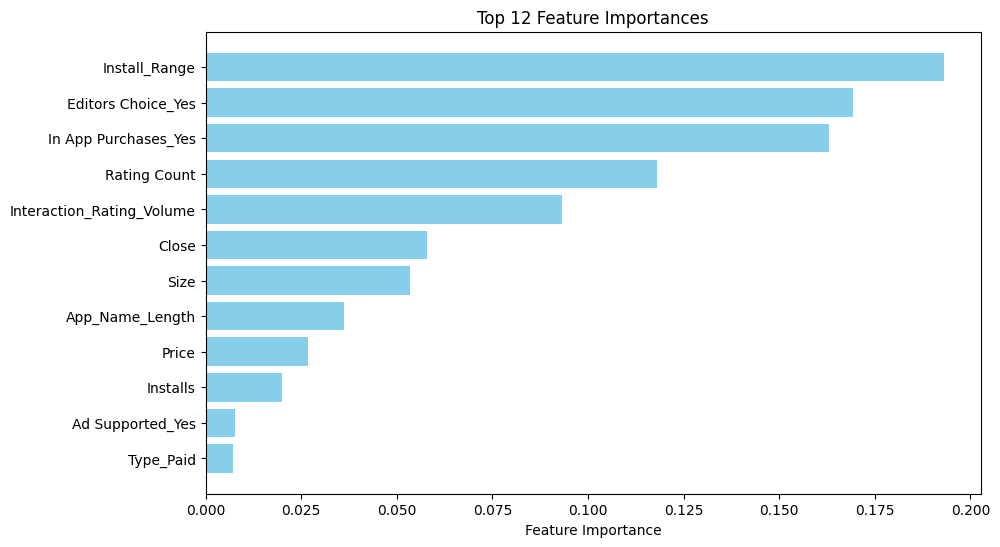

In [13]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get the indices of the top 10 features sorted by importance
top_12_indices = feature_importances.argsort()[-12:][::-1]

# Get the names of the top 10 features
top_12_features = X_train.columns[top_12_indices]

# bar chart for feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_12_features)), feature_importances[top_12_indices], align='center', color='skyblue')
plt.yticks(range(len(top_12_features)), top_12_features)
plt.xlabel('Feature Importance')
plt.title('Top 12 Feature Importances')
plt.gca().invert_yaxis()  
plt.show()


The coefficients obtained from the random forest model indicate the strength and direction of the relationship between each feature and the target variable (the app's rating). Here's how we can interpret the top  important features:
* **Install_Range:** This feature likely represents a range of installation counts for the app. It could indicate the popularity or demand for the app. Apps with higher installation ranges might have more visibility or user engagement, potentially leading to higher ratings.
* **Editors Choice_Yes**: This indicates whether the app has been selected as an Editor's Choice. Being chosen as an Editor's Choice can provide additional exposure and credibility for the app, which may positively influence user perception and ratings.
* **In App Purchases_Yes**: This binary feature signifies whether the app offers in-app purchases. Apps with in-app purchases might provide additional content, features, or benefits to users, enhancing their overall experience and potentially leading to higher ratings.
* **Rating Count**: This feature represents the total number of ratings received by the app. Higher rating counts indicate greater user feedback and engagement. Apps with a large number of ratings may be perceived as more established or trustworthy, influencing potential users and their ratings.
* **Interaction_Rating_Volume**: This feature could represent the volume or intensity of interactions (e.g., user reviews, comments, likes) related to the app. Higher interaction volumes might indicate greater user engagement or community activity, which could correlate with higher app ratings.
* **Size**: This feature represents the size of the app in terms of storage space required for installation. While not directly related to app quality, smaller app sizes are generally preferred by users, as they consume less device storage and are quicker to download.
* **App_Name_Length**: The length of the app name might indirectly influence ratings. Short, catchy names might be more memorable and easier to find in app stores, potentially leading to more downloads and higher ratings.
* **Price**: The price of the app, if it's a paid app, can influence user perceptions of value. Users may have higher expectations for paid apps and thus provide more critical ratings compared to free apps.
* **Installs**: This feature likely represents the total number of installations for the app. Higher installation numbers can signal popularity and trustworthiness, positively impacting user perceptions and ratings.
* **Ad Supported_Yes**: This feature indicates whether the app contains advertisements. Ad-supported apps might offer free content in exchange for displaying ads, which could affect user experience and ratings depending on the implementation.
* **Type_Paid**: This feature indicates whether the app is paid. Paid apps may have different user expectations compared to free apps, potentially affecting ratings.

# SUMMARY


The linear regression model, Random Forest Regressor, Gradient Boosting Regressor, XGB Regressor, SVR, MLP Regressor is trained and evaluated on the dataset. Evaluation metrics such as MSE, MAE, MedAE, and R2 are used to assess the model's performance. Found thatRandom Forest model performs best with an R-squared (R2): 0.697. Feature importance analysis helps identify the key features that contribute to predicting app ratings. The feature importance plot provides a visual representation of the most important features and their coefficients.